# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.python.client import device_lib
from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    

from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())
print('TensorFlow version:', tf.__version__)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4914194149160259708
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6797517490823496794
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15701401920
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16010293777712095357
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15764360019896752399
physical_device_desc: "device: XLA_GPU device"
]
TensorFlow version: 2.2.0


# Task 2: Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    #randome and unique
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [3]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()

x_train,y_train= get_three_classes(x_train,y_train)
x_test, y_test= get_three_classes(x_test, y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 3s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

In [4]:
class_names = ['aeroplane', 'car', 'bird']

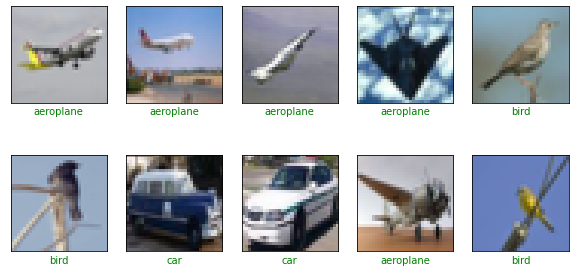

In [5]:
def show_randome_example(x,y,p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
            plt.subplot(2,5,1+i)
            plt.imshow(x[i])
            plt.xticks([])
            plt.yticks([])
            col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
            plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()
        
show_randome_example(x_train, y_train, y_train)

# Task 4: Create Model

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense


def create_model():

    def add_conv_block(model, num_filters, input_shape=None):

        if input_shape:
            model.add(Conv2D(num_filters, 3, activation='relu', padding='same', input_shape=input_shape))
        else:
            model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))

        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu', padding='valid'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.2))

        return model

    model = tf.keras.models.Sequential()
    model = add_conv_block(model, 32, input_shape=(32, 32, 3))
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)

    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)       

# Task 5: Train the Model

In [8]:
%%time

h = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255., y_test),
    epochs=10, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5', save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)


Epoch 1/10
118/118 [==============================] - 2s 15ms/step - loss: 0.6551 - accuracy: 0.7439 - val_loss: 2.1801 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4296 - accuracy: 0.8295 - val_loss: 2.8979 - val_accuracy: 0.3337
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.3483 - accuracy: 0.8639 - val_loss: 1.6318 - val_accuracy: 0.5330
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2932 - accuracy: 0.8867 - val_loss: 0.9280 - val_accuracy: 0.6443
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2448 - accuracy: 0.9055 - val_loss: 0.2775 - val_accuracy: 0.8907
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2245 - accuracy: 0.9120 - val_loss: 0.3633 - val_accuracy: 0.8610
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.2060 - accuracy: 0.9210 - val_loss: 0.2456 - val_accuracy: 0.9103

# Task 6: Final Predictions

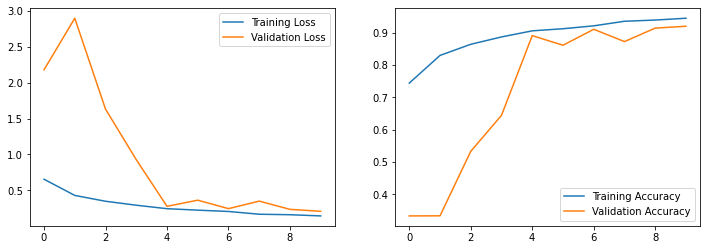

In [9]:
losses = h.history['loss']
accs = h.history['accuracy']
val_losses = h.history['val_loss']
val_accs = h.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [10]:
model = tf.keras.models.load_model('./models/model_0.920.h5')
preds = model.predict(x_test/255.)

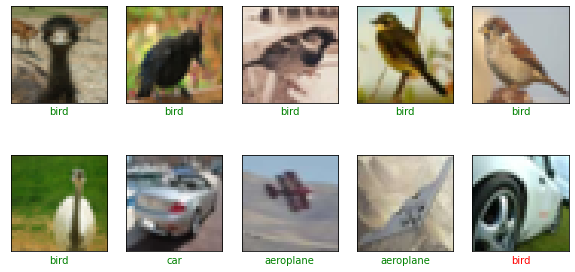

In [12]:
show_randome_example(x_test, y_test, preds)